
# Laboratory 4: New Keynesian Model - Homework Solutions
#### Group K members:
- Akabi Bastiana (490334)
- Doliev Mekhroj (487990)
- Khudayberganov Asadbek (436840)
- Nomcoyiya Nomakhephu (488379)
- Wójcik Artur (394608)


In [1]:
from matplotlib import rcParams

# Restore old behavior of rounding default axis ranges
rcParams['axes.autolimit_mode'] = 'round_numbers'
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0

In [2]:
from Dynare import *

# Homework
The other important shocks in the New Keynesian Model are demand and cost push-up shocks. We can incorporate them into the 3-eq New Keynesian model in following way.

The New Keynesian IS (NKIS) with demand shock where demand shock follows AR(1) process is given by

\begin{align}
x_{t} & =\mathrm{E}_{t}x_{t+1}-\frac{1}{\sigma}\left(i_{t}-\mathrm{E}_{t}\pi_{t+1}-r_{t}^{n}\right)+u_{t}\\
u_{t} & = \rho_{u}u_{t-1}+\epsilon_{u,t}
\end{align}

The New Keynesian Phillips Curve (NKPC) with cost push-up shock where cost push-up shock follows AR(1) process is given by

\begin{align}
\pi_{t} & =\beta\mathrm{E}_{t}\pi_{t+1}+\kappa x_{t}+e_{t}\\
e_{t} & = \rho_{e}e_{t-1}+\epsilon_{e,t}
\end{align}


**Task 1**: Insert the **demand shock** given in the above **New Keynesian IS equation** into the New Keynesian Model. Compute impulse response functions (IRFS) of the variables following a **demand shock**. Briefly comment on the responses of inflation, output gap, and nominal interest rate. 


STEADY-STATE RESULTS

Pi 	0.0000
x 	0.0000
i 	0.0000
y 	0.0000
r_r 	0.0000
n 	0.0000
p 	0.0000
u 	0.0000
w 	0.0000
y_n 	0.0000
r_n 	0.0000
a 	0.0000

POLICY AND TRANSITION FUNCTIONS

		Pi	x	i	y	r_r	n	p	u	w	y_n	r_n	a
Constant	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000
p(-1) 		-0.0000	0.0000	-0.0000	0.0000	-0.0000	0.0000	1.0000	0.0000	1.0000	0.0000	0.0000	0.0000
u(-1) 		1.0436	1.5651	1.5002	1.5651	0.7174	2.0868	1.0436	0.7500	12.0411	0.0000	0.0000	0.0000
a(-1) 		-0.2796	-0.1775	-0.3717	0.6002	-0.1200	-0.3997	-0.2796	0.0000	-0.5860	0.7777	-0.1555	0.9000
eps_u     		1.3915	2.0868	2.0002	2.0868	0.9566	2.7824	1.3915	1.0000	16.0548	0.0000	0.0000	0.0000



	Impulse response functions to eps_u


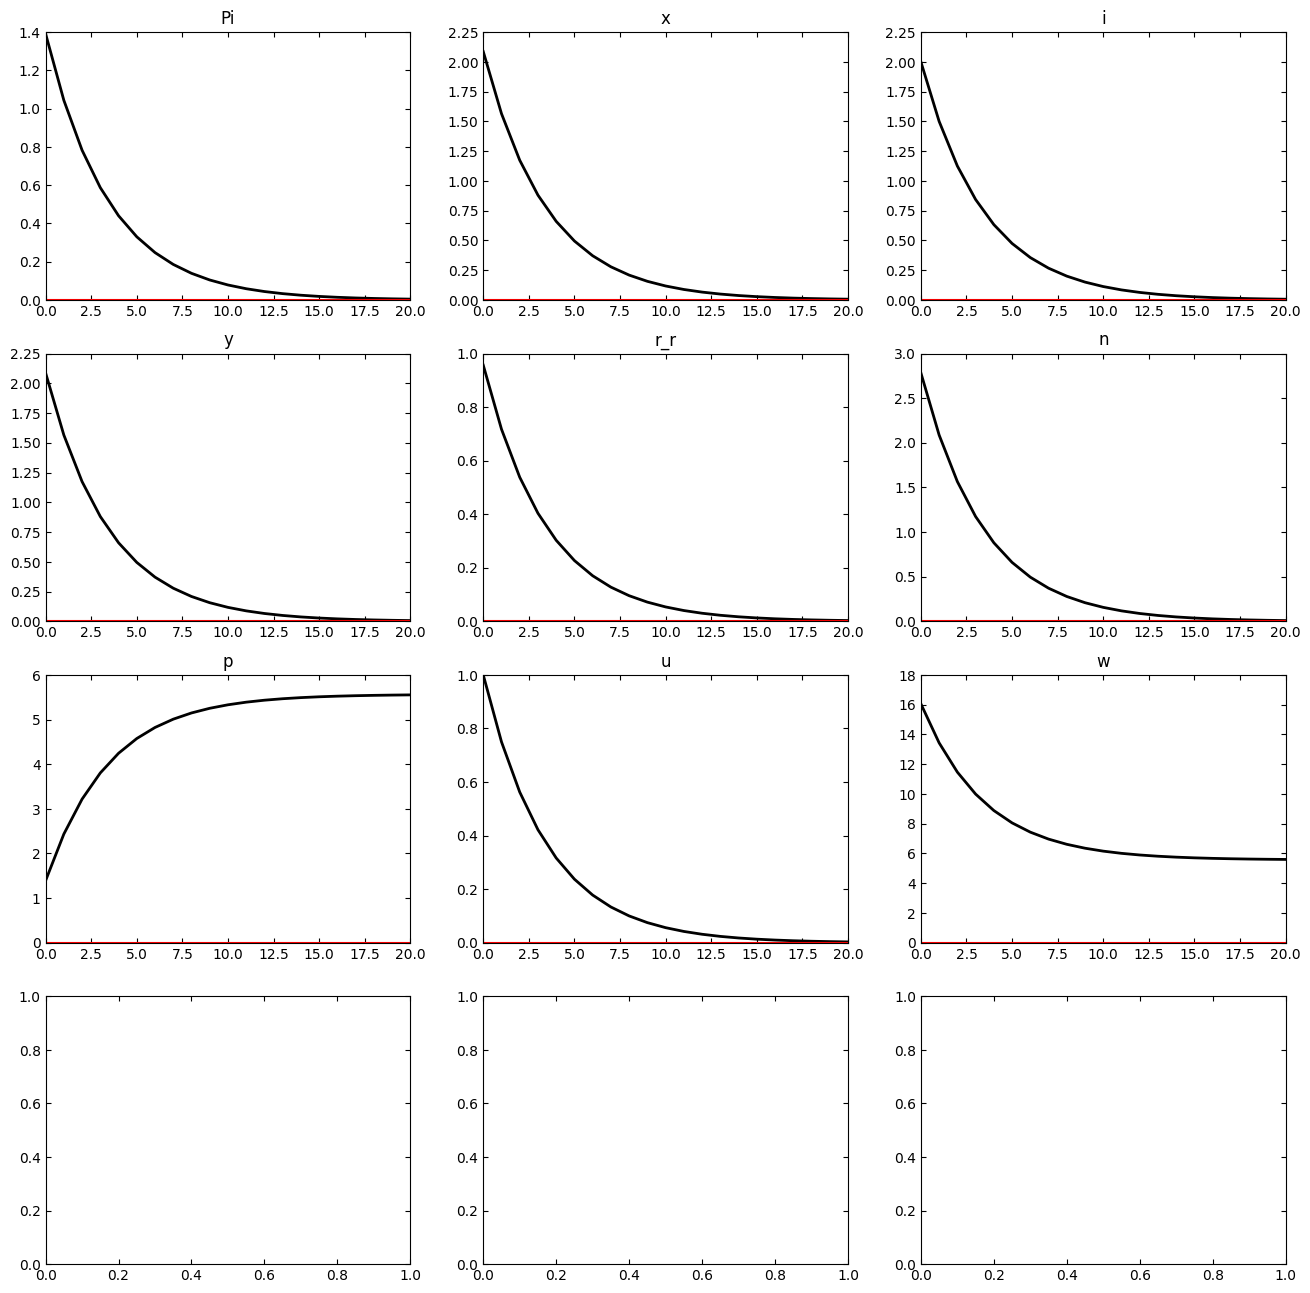

In [3]:
var = 'Pi x i y r_r n p u w y_n r_n a'
varexo = 'eps_u'

param_values = {'alppha':0.25, sy.symbols('beta'):0.99, 'siggma':2, 'eta':3.77, 'rho_u':0.75,
                'theta':0.75, 'kappa':0.1717, 'phi_pi':1.25, 'phi_x':0.125, 'rho_a':0.9}

model = ('-Pi + betta*Pi(+1)+kappa*x',
         '-x + x(+1) - (i - Pi(+1) - r_n)/siggma + u',
         '-i + phi_pi*Pi+phi_x*x',
         '-r_n + -siggma*(1+eta)/(siggma*(1-alppha)+eta+alppha)*(1-rho_a)*a',
         '-r_r + i-Pi(+1)',
         '-y_n + (1+eta)/(siggma*(1-alppha)+eta+alppha)*a',
         '-x + y-y_n',
         '- u + rho_u*u(-1) + eps_u',
         '-a + rho_a*a(-1)',
         '-y + a+(1-alppha)*n',
         '-Pi + p-p(-1)',
         '-w+p+siggma*y+eta*n')

initval = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

rbc = Dynare(var, varexo, param_values, model, initval)
rbc.steady()
rbc.stoch_simul(irf=20)

**Task 2**: Insert the **cost push-up shock** given in the above **NKPC equation** into the New Keynesian Model. Compute impulse response functions (IRFS) of the variables following a **cost push-up shock**. Briefly comment on the responses of inflation, output gap, and nominal interest rate. 

In [4]:
var = 'Pi x i y r_r n p e w y_n r_n a'
varexo = 'eps_e'

param_values = {'alppha':0.25, sy.symbols('beta'):0.99, 'siggma':2, 'eta':3.77, 'rho_e':0.75,
                'theta':0.75, 'kappa':0.1717, 'phi_pi':1.25, 'phi_x':0.125, 'rho_a':0.9}

model = ('-Pi + betta*Pi(+1)+kappa*x+e',
         '-x + x(+1)-1/siggma*(i-Pi(+1)-r_n)',
         '-i + phi_pi*Pi+phi_x*x',
         '-r_n + -siggma*(1+eta)/(siggma*(1-alppha)+eta+alppha)*(1-rho_a)*a',
         '-r_r + i-Pi(+1)',
         '-y_n + (1+eta)/(siggma*(1-alppha)+eta+alppha)*a',
         '-x + y-y_n',
         '-e + rho_e*e(-1)+eps_e',
         '-a + rho_a*a(-1)',
         '-y + a+(1-alppha)*n',
         '-Pi + p-p(-1)',
         '-w+p+siggma*y+eta*n')



initval = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
rbc = Dynare(var, varexo, param_values, model, initval)
rbc.steady()
rbc.stoch_simul(irf=20)


STEADY-STATE RESULTS

Pi 	0.0000
x 	0.0000
i 	0.0000
y 	0.0000
r_r 	0.0000
n 	0.0000
p 	0.0000
e 	0.0000
w 	0.0000
y_n 	0.0000
r_n 	0.0000
a 	0.0000


RuntimeError: Blanchard Kahn conditions are not satisfied: no stable equilibrium